In [1]:
# Kütüphaneler

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data

applications = pd.read_excel('Applications.xlsx')
applications.shape
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36449 entries, 0 to 36448
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                36449 non-null  int64 
 1   Gender            36449 non-null  int64 
 2   Own_car           36449 non-null  int64 
 3   Own_property      36449 non-null  int64 
 4   Work_phone        36449 non-null  int64 
 5   Phone             36449 non-null  int64 
 6   Email             36449 non-null  int64 
 7   Unemployed        36449 non-null  int64 
 8   Num_children      36449 non-null  int64 
 9   Family_size       36449 non-null  int64 
 10  Age_year          36449 non-null  int64 
 11  Account_duration  36449 non-null  int64 
 12  Employment_year   36449 non-null  int64 
 13  Total_income      36449 non-null  int64 
 14  Income_type       36449 non-null  object
 15  Education         36449 non-null  object
 16  Marital_status    36449 non-null  object
 17  Housing_type

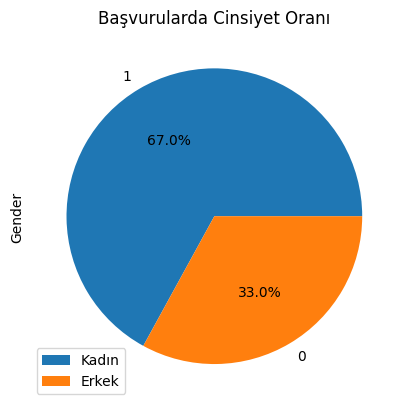

In [3]:
gender = applications.Gender.value_counts(normalize=True)
gender_val = gender.plot.pie(autopct='%1.1f%%')
labels = ['Kadın', 'Erkek']
plt.legend(labels=labels)
plt.title("Başvurularda Cinsiyet Oranı")
plt.show()

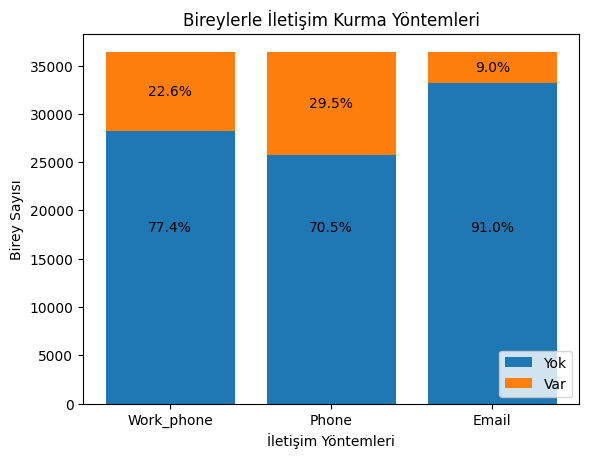

In [4]:
selected_columns = ['Work_phone', 'Phone', 'Email']
df_selected = applications[selected_columns]
count_0 = df_selected.eq(0).sum()
count_1 = df_selected.eq(1).sum()
total_counts = count_0 + count_1
percent_0 = count_0 / total_counts * 100
percent_1 = count_1 / total_counts * 100
plt.bar(selected_columns, count_0, label='Yok')
plt.bar(selected_columns, count_1, bottom=count_0, label='Var')
for i, (c0, c1) in enumerate(zip(count_0, count_1)):
    x = selected_columns[i]
    y = c0 + c1
    plt.text(x, y -(c0+c1)/2, f'{percent_0[i]:.1f}%', ha='center', va='center')
    plt.text(x, y - c1/2, f'{percent_1[i]:.1f}%', ha='center', va='center')
plt.xlabel('İletişim Yöntemleri')
plt.ylabel('Birey Sayısı')
plt.title('Bireylerle İletişim Kurma Yöntemleri')
plt.legend(loc='lower right')
plt.show()

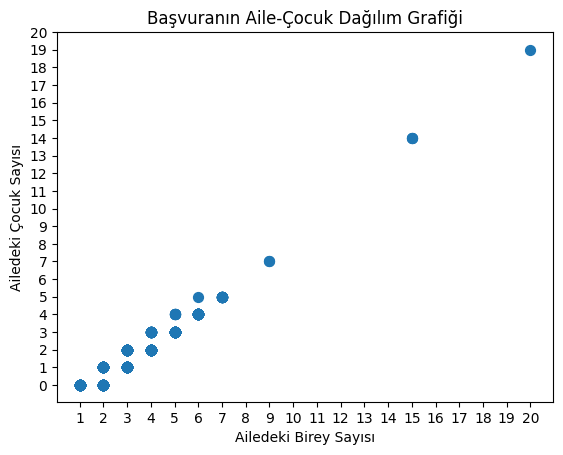

In [5]:
plt.scatter(applications['Family_size'], applications['Num_children'], s=50)
plt.xlabel('Ailedeki Birey Sayısı')
plt.ylabel('Ailedeki Çocuk Sayısı')
plt.title('Başvuranın Aile-Çocuk Dağılım Grafiği')
plt.xticks(range(int(min(applications['Family_size'])), int(max(applications['Family_size']))+1))
plt.yticks(range(int(min(applications['Num_children'])), int(max(applications['Num_children']))+2))
plt.show()

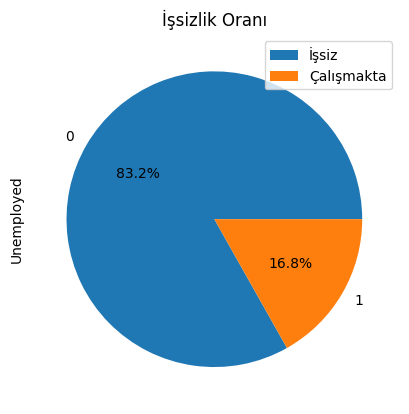

In [6]:
une = applications.Unemployed.value_counts(normalize=True)
une_val = une.plot.pie(autopct='%1.1f%%')
labels = ['İşsiz', 'Çalışmakta']
plt.legend(labels=labels)
plt.title("İşsizlik Oranı")
plt.show()

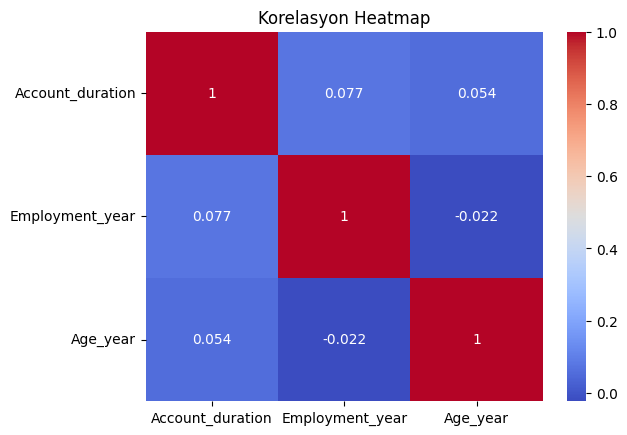

In [7]:
account_duration = applications['Account_duration']
employment_year = applications['Employment_year']
age_year = applications['Age_year']
data = pd.concat([account_duration, employment_year, age_year], axis=1)
correlation_aea = data.corr()
sns.heatmap(correlation_aea, annot=True, cmap='coolwarm')
plt.title('Korelasyon Heatmap')
plt.show()


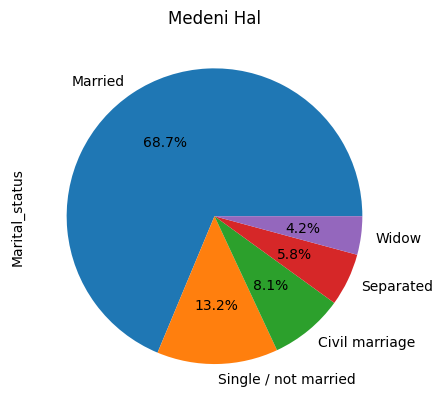

In [8]:
mar = applications.Marital_status.value_counts(normalize=True)
mar_val = mar.plot.pie(autopct='%1.1f%%')
plt.title("Medeni Hal")
plt.show()


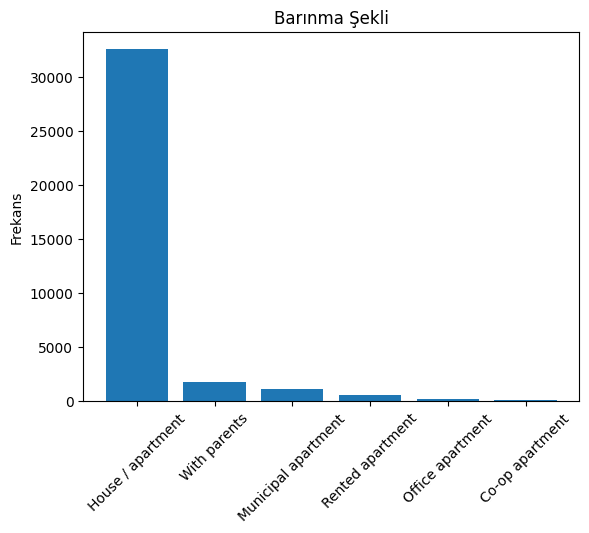

In [9]:
hous = applications['Housing_type']
hous_counts = hous.value_counts()
plt.bar(hous_counts.index, hous_counts.values)
plt.title('Barınma Şekli')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

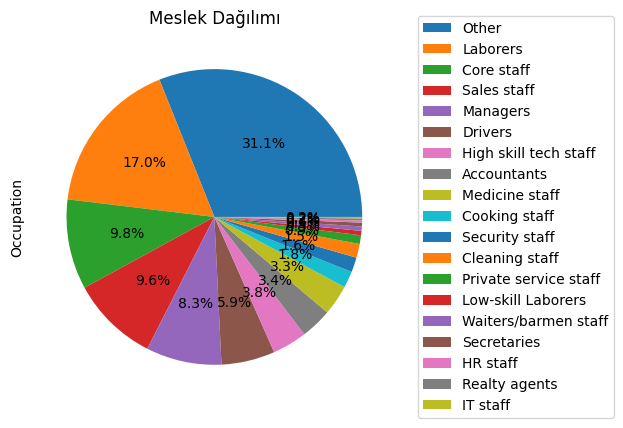

In [10]:
occ = applications.Occupation.value_counts(normalize=True)
labels = occ.index.astype(str)
occ_val = occ.plot.pie(labels= None, autopct='%1.1f%%')
plt.legend(labels= labels, loc="center right", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.title("Meslek Dağılımı")
plt.show()

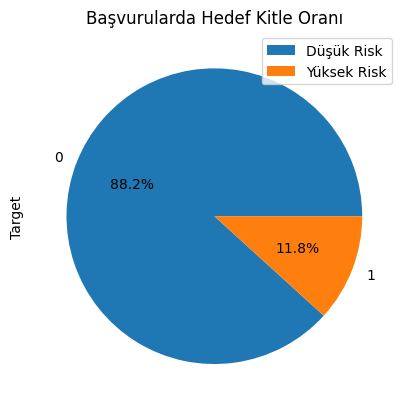

In [11]:
target = applications.Target.value_counts(normalize=True)
tar_val = target.plot.pie(autopct='%1.1f%%')
labels = ['Düşük Risk', 'Yüksek Risk']
plt.legend(labels=labels)
plt.title("Başvurularda Hedef Kitle Oranı")
plt.show()

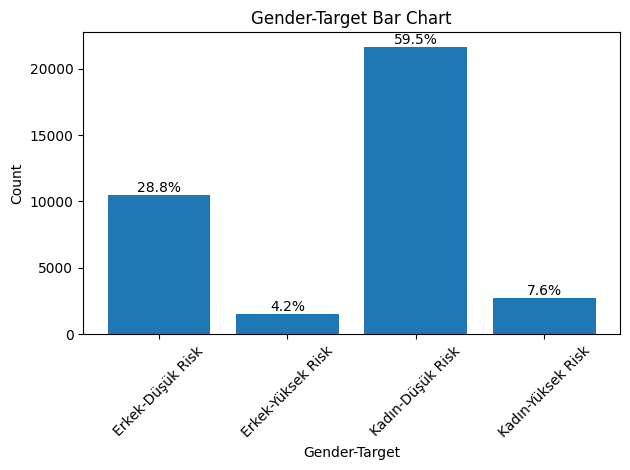

In [12]:
gen_tar = applications.groupby(['Gender','Target']).agg({'ID': 'count'})
gender = gen_tar.index.get_level_values('Gender')
target = gen_tar.index.get_level_values('Target')
count = gen_tar['ID']
labels = ['Erkek-Düşük Risk', 'Erkek-Yüksek Risk', 'Kadın-Düşük Risk', 'Kadın-Yüksek Risk']
fig, ax = plt.subplots()
bars= ax.bar(range(len(count)), count)
total = sum(count)
for bar in bars:
    height = bar.get_height()
    percentage = f'{(height/total)*100:.1f}%'
    ax.text(bar.get_x() + bar.get_width() / 2, height, percentage, ha='center', va='bottom')
ax.set_xticks(range(len(count)))
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Gender-Target')
ax.set_ylabel('Count')
ax.set_title('Gender-Target Bar Chart')
plt.tight_layout()
plt.show()

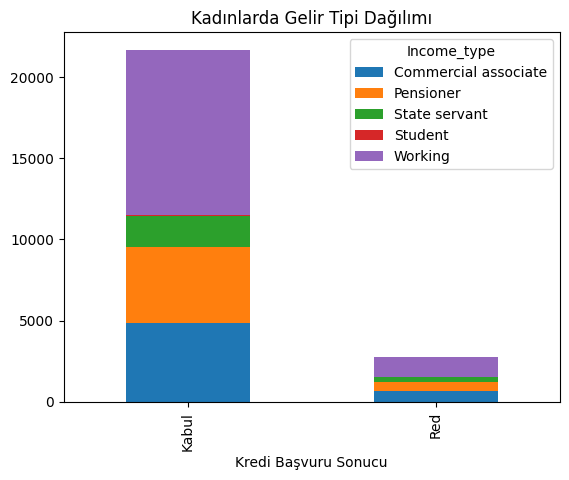

In [13]:
df_f = applications[applications['Gender'] == 1]
grouped = df_f.groupby(['Target', 'Income_type']).size().unstack()
ax= grouped.plot(kind='bar', stacked=True)
labels = ['Kabul', 'Red']
ax.set_xticklabels(labels)
plt.title('Kadınlarda Gelir Tipi Dağılımı')
plt.xlabel('Kredi Başvuru Sonucu')
plt.show()

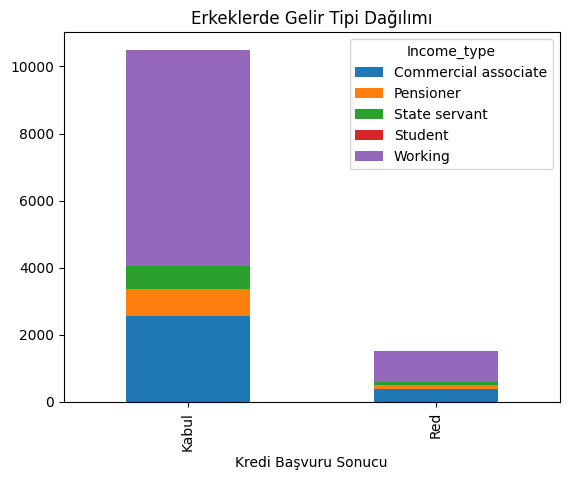

In [14]:
df_m = applications[applications['Gender'] == 0]
grouped = df_m.groupby(['Target', 'Income_type']).size().unstack()
ax= grouped.plot(kind='bar', stacked=True)
labels = ['Kabul', 'Red']
ax.set_xticklabels(labels)
plt.title('Erkeklerde Gelir Tipi Dağılımı')
plt.xlabel('Kredi Başvuru Sonucu')
plt.show()

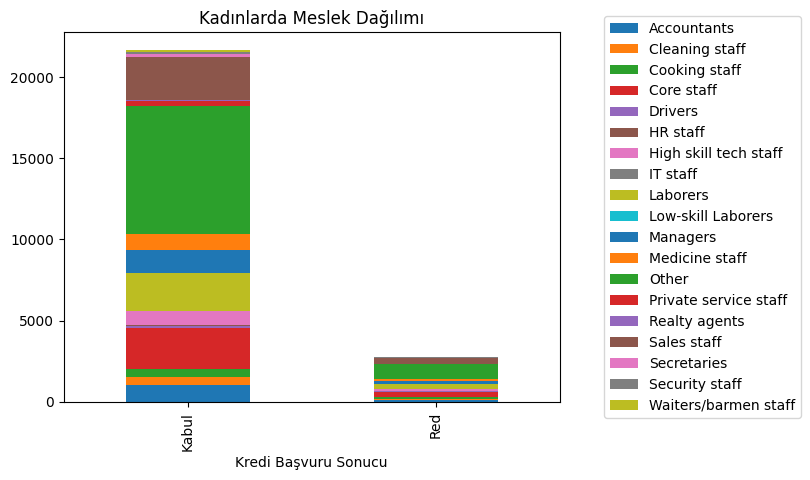

In [15]:
df_f = applications[applications['Gender'] == 1]
grouped = df_f.groupby(['Target', 'Occupation']).size().unstack()
ax= grouped.plot(kind='bar', stacked=True)
labels = ['Kabul', 'Red']
ax.set_xticklabels(labels)
plt.title('Kadınlarda Meslek Dağılımı')
plt.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel('Kredi Başvuru Sonucu')
plt.show()

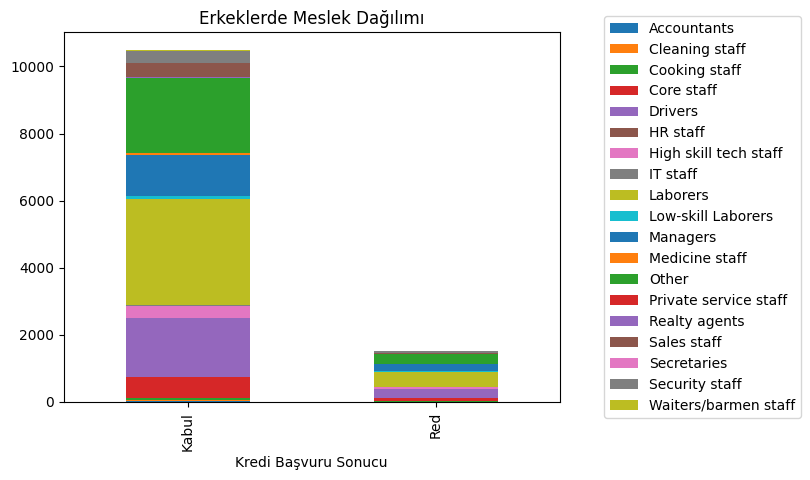

In [16]:
df_m = applications[applications['Gender'] == 0]
grouped = df_m.groupby(['Target', 'Occupation']).size().unstack()
ax= grouped.plot(kind='bar', stacked=True)
labels = ['Kabul', 'Red']
ax.set_xticklabels(labels)
plt.title('Erkeklerde Meslek Dağılımı')
plt.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel('Kredi Başvuru Sonucu')
plt.show()